## Imports

In [6]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [14]:
def solve_2d_linearconv_pure(u, nt, dt, dx, dy, c):
   
    row, col = u.shape

    #fill the update of u

    for n in range(nt): 
        
        for j in range(1, row):
            for i in range(1, col):
                u[j, i] = u[j, i] - (c * dt / dx * (u[j, i] - u[j, i - 1])) -(c * dt / dy * (u[j, i] - u[j - 1, i]))                     
                u[0, :] = 1
                u[-1, :] = 1
                u[:, 0] = 1
                u[:, -1] = 1
               
    return 0
               

## Numba accelerator

In [7]:
@njit(fastmath=True)
def solve_2d_linearconv_numba(u, nt, dt, dx, dy, c):
   
    row, col = u.shape

    #fill the update of u
    for n in range(nt): 
        
        for j in range(1, row):
            for i in range(1, col):
                u[j, i] = u[j, i] - (c * dt / dx * (u[j, i] - u[j, i - 1])) -(c * dt / dy * (u[j, i] - u[j - 1, i]))                   
                u[0, :] = 1
                u[-1, :] = 1
                u[:, 0] = 1
                u[:, -1] = 1
               
    return 0

## Pyccel accelerator

In [13]:
@types('float[:,:]', 'int','float','float','float', 'float')
def solve_2d_linearconv_pyccel(u, nt, dt, dx, dy, c):
   
    row, col = u.shape

    #fill the update of u and v
    for n in range(nt): 
        
        for j in range(1, row):
            for i in range(1, col):
                u[j, i] = u[j, i] - (c * dt / dx * (u[j, i] - u[j, i - 1])) -(c * dt / dy * (u[j, i] - u[j - 1, i]))                    
                u[0, :] = 1
                u[-1, :] = 1
                u[:, 0] = 1
                u[:, -1] = 1
               
    return 0

## Inputs

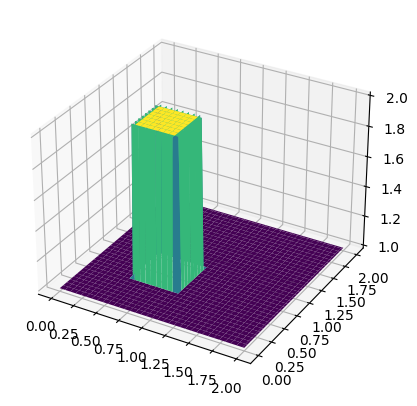

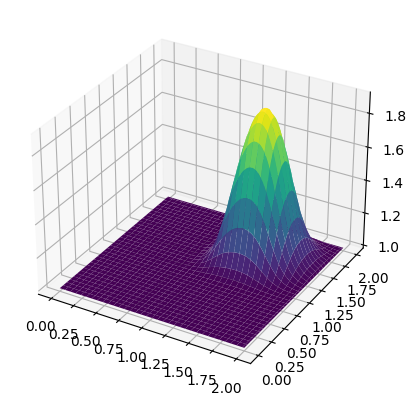

In [15]:
###variable declarations
nx = 101
ny = 101
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u0 = np.ones((ny, nx)) ##create a 1xn vector of 1's
u0[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
u = u0.copy()


solve_2d_linearconv_pure(u, nt, dt, dx, dy, c)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

## Call Funtions

### Pure function

In [9]:
%timeit solve_2d_linearconv_pure(u, nt, dt, dx, dy, c)

3.69 s ± 49.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [10]:
%timeit solve_2d_linearconv_numba(u, nt, dt, dx, dy, c)

116 ms ± 7.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [11]:
solve_2d_linearconv_f90 = epyccel(solve_2d_linearconv_pyccel)

In [12]:
%timeit solve_2d_linearconv_f90(u,nt, dt, dx, dy, c)

173 ms ± 5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
